In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("NSL-KDD/KDDTrain+.txt")
pd.set_option('display.max_columns', None)
data.head()
test_df = pd.read_csv("NSL-KDD/KDDTest+.txt")

In [3]:
#Присваиваем имена колонкам
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

data.columns = columns
test_df.columns = columns

In [4]:
#Вывод значений всех колонок из датасета
for i in data.columns:
    x = data[i].value_counts()
    print("Column name is:",i,"and it value is:",x)

Column name is: duration and it value is: duration
0        115954
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64
Column name is: protocol_type and it value is: protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64
Column name is: service and it value is: service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
Column name is: flag and it value is: flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64
Column name is: src_bytes and it value is: src_bytes
0      

In [5]:
#Присвоение флага факта атаки
is_attack = data.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)
data['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [6]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0


In [7]:
data_attack = data[data["attack"] != "normal"]

In [8]:
data_attack['attack'].value_counts()

attack
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

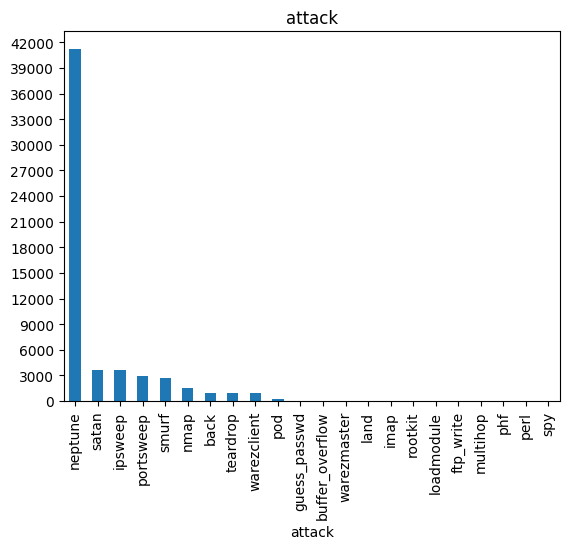

In [9]:
#Диаграмма распределенности атак
categorical_features = ["attack"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(data_attack[categorical_features]):
    data_attack[categorical_feature].value_counts().plot(kind="bar").set_title(categorical_feature)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 45000, 3000.0))
plt.show()

In [10]:
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']


attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# Дата-маппинг по типам атак
def map_attack(attack):
    if attack in dos_attacks:
        # дос-атаки - метка 1
        attack_type = 1
    elif attack in probe_attacks:
        # атаки разведывательного анализа - метка 2
        attack_type = 2
    elif attack in privilege_attacks:
        # повышение привилегий - метка 3
        attack_type = 3
    elif attack in access_attacks:
        # атаки удаленногд доступа - метка 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# Применяем маппинг к датасету
attack_map = data.attack.apply(map_attack)
data['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# Смотрим результат
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [13]:
#Заполнение сервисов, представленных малым числом значений модой
data['service'].replace(['aol', 'harvest', 'http_2784','http_8001','red_i','urh_i'], 'http', inplace=True)

In [14]:
data['service'].value_counts()

service
http        40363
private     21853
domain_u     9043
smtp         7313
ftp_data     6859
            ...  
printer        69
shell          65
tim_i           8
pm_dump         5
tftp_u          3
Name: count, Length: 64, dtype: int64

In [15]:
#Категориальные признаки
df_categorical_features = data.select_dtypes(include=[object])

df_categorical_features.columns

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [16]:
#Числовые признаки
df_numeric_features = data.select_dtypes(include=[np.number])

df_numeric_features.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'attack_flag', 'attack_map'],
      dtype='object')

In [17]:
#Кросстаб атак и типов протоколов
attack_vs_protocol = pd.crosstab(data.attack, data.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
attack,,,
back,0,956,0
buffer_overflow,0,30,0
ftp_write,0,8,0
guess_passwd,0,53,0
imap,0,11,0
ipsweep,3117,482,0
land,0,18,0
loadmodule,0,9,0
multihop,0,7,0


In [18]:
# Подготовка к процессингу числовых признаков
data_numeric = data[["duration", "src_bytes", "dst_bytes", "hot", "num_compromised", "num_root", "num_shells", "count", "srv_count", "dst_host_srv_count"]]

test_data_numeric = test_df[["duration", "src_bytes", "dst_bytes", "hot", "num_compromised", "num_root", "num_shells", "count", "srv_count", "dst_host_srv_count"]]

In [19]:
# Подготовка к процессингу категориальных признаков
data_categorical = data[["protocol_type","service","flag"]]

test_data_categorical = test_df[["protocol_type","service","flag"]]

In [20]:
# Множество признаков, не требующих нормализации (их значения находятся в пределах от 0 до 1)
data_already_preprocessed = data[["logged_in","is_guest_login","serror_rate","srv_serror_rate"
,"rerror_rate"
,"srv_rerror_rate"
,"same_srv_rate"
,"diff_srv_rate"
,"srv_diff_host_rate"
,"dst_host_same_srv_rate"
,"dst_host_diff_srv_rate"
,"dst_host_same_src_port_rate"
,"dst_host_srv_diff_host_rate"
,"dst_host_serror_rate"
,"dst_host_srv_serror_rate"
,"dst_host_srv_rerror_rate"
,"attack_flag"]]

test_data_already_preprocessed = test_df[["logged_in","is_guest_login","serror_rate","srv_serror_rate"
,"rerror_rate"
,"srv_rerror_rate"
,"same_srv_rate"
,"diff_srv_rate"
,"srv_diff_host_rate"
,"dst_host_same_srv_rate"
,"dst_host_diff_srv_rate"
,"dst_host_same_src_port_rate"
,"dst_host_srv_diff_host_rate"
,"dst_host_serror_rate"
,"dst_host_srv_serror_rate"
,"dst_host_srv_rerror_rate"
,"attack_flag"]]

In [21]:
data_numeric.shape

(125972, 10)

In [22]:
test_data_numeric.shape

(22543, 10)

In [23]:
data_categorical.shape

(125972, 3)

In [24]:
test_data_categorical.shape

(22543, 3)

In [25]:
data_already_preprocessed.shape

(125972, 17)

In [26]:
test_data_already_preprocessed.shape

(22543, 17)

In [27]:
# Блок нормализации числовых признаков тренировочного датасета
min_max = MinMaxScaler()

data_numeric_norm = pd.DataFrame(min_max.fit_transform(data_numeric.iloc[:,0:10]),
columns = data_numeric.iloc[:,0:10].columns.tolist())
data_numeric_norm.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_shells,count,srv_count,dst_host_srv_count
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.025440,0.001957,0.003922
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.240705,0.011742,0.101961
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.009785,0.009785,1.000000
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.058708,0.062622,1.000000
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.236791,0.037182,0.074510


In [28]:
# Блок нормализации категориальных признаков тренировочного датасета
for col in data_categorical.columns.values:
    one_hot_encoded_variables = pd.get_dummies(data_categorical[col], prefix=col)
    data_categorical = pd.concat([data_categorical,one_hot_encoded_variables], axis = 1)
    data_categorical.drop([col], axis = 1, inplace = True)

In [29]:
#Конкатенация двух предобработанных частей тренировочного датасета (числовые и категориальные признаки)
df_train_data = pd.concat([data_numeric_norm, data_categorical, data_already_preprocessed], axis = 1)

In [30]:
# Замена OHE - символов False и True на 0 и 1 соответственно
df_train_data.replace({False: 0, True: 1}, inplace=True)

In [31]:
df_train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 105 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    duration                     float64
 1    src_bytes                    float64
 2    dst_bytes                    float64
 3    hot                          float64
 4    num_compromised              float64
 5    num_root                     float64
 6    num_shells                   float64
 7    count                        float64
 8    srv_count                    float64
 9    dst_host_srv_count           float64
 10   protocol_type_icmp           int64  
 11   protocol_type_tcp            int64  
 12   protocol_type_udp            int64  
 13   service_IRC                  int64  
 14   service_X11                  int64  
 15   service_Z39_50               int64  
 16   service_auth                 int64  
 17   service_bgp                  int64  
 18   service_courier       

In [32]:
df_train_data.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_shells,count,srv_count,dst_host_srv_count,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,logged_in,is_guest_login,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,attack_flag
0,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.025440,0.001957,0.003922,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0
1,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.240705,0.011742,0.101961,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,0.10,0.05,0.00,0.00,1.00,1.00,0.00,1
2,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.009785,0.009785,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,1.00,0.00,0.03,0.04,0.03,0.01,0.01,0
3,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.058708,0.062622,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.236791,0.037182,0.074510,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,1.0,0.16,0.06,0.00,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1


In [33]:
# Блок нормализации числовых признаков тестового датасета
min_max = MinMaxScaler()

test_data_numeric_norm = pd.DataFrame(min_max.fit_transform(test_data_numeric.iloc[:,0:10]),
columns = test_data_numeric.iloc[:,0:10].columns.tolist())
test_data_numeric_norm.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_shells,count,srv_count,dst_host_srv_count
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.266145,0.001957,0.003922
1,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.001957,0.001957,0.337255
2,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.001957,0.127202,0.223529
3,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.001957,0.015656,0.337255
4,0.000000,4.249857e-06,0.010784,0.0,0.0,0.0,0.0,0.007828,0.007828,1.000000


In [34]:
# Блок нормализации категориальных признаков тестового датасета
for col in test_data_categorical.columns.values:
    one_hot_encoded_variables = pd.get_dummies(test_data_categorical[col], prefix=col)
    test_data_categorical = pd.concat([test_data_categorical,one_hot_encoded_variables], axis = 1)
    test_data_categorical.drop([col], axis = 1, inplace = True)

In [35]:
# Конкатенация нормализованных блоков уже тестового датасета
df_test_data = pd.concat([test_data_numeric_norm, test_data_categorical, test_data_already_preprocessed], axis = 1)

In [36]:
# Аналогичная замена OHE - символов на 0 и 1
df_test_data.replace({False: 0, True: 1}, inplace=True)

In [37]:
df_test_data.head()

,duration,src_bytes,dst_bytes,hot,num_compromised,num_root,num_shells,count,srv_count,dst_host_srv_count,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,logged_in,is_guest_login,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,attack_flag
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.266145,0.001957,0.003922,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.00,1.0,1.0,0.01,0.06,0.00,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1
1,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.001957,0.001957,0.337255,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0
2,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.001957,0.127202,0.223529,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.00,0.0,0.0,1.00,0.00,1.00,1.00,0.00,1.00,0.28,0.00,0.0,0.00,1
3,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.001957,0.015656,0.337255,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.12,1.0,0.5,1.00,0.00,0.75,0.31,0.17,0.03,0.02,0.00,0.0,0.71,1
4,0.000000,4.249857e-06,0.010784,0.0,0.0,0.0,0.0,0.007828,0.007828,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.0,0.00,0.0,0.0,1.00,0.00,0.00,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0


In [38]:
df_test_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 105 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    duration                     float64
 1    src_bytes                    float64
 2    dst_bytes                    float64
 3    hot                          float64
 4    num_compromised              float64
 5    num_root                     float64
 6    num_shells                   float64
 7    count                        float64
 8    srv_count                    float64
 9    dst_host_srv_count           float64
 10   protocol_type_icmp           int64  
 11   protocol_type_tcp            int64  
 12   protocol_type_udp            int64  
 13   service_IRC                  int64  
 14   service_X11                  int64  
 15   service_Z39_50               int64  
 16   service_auth                 int64  
 17   service_bgp                  int64  
 18   service_courier         

In [41]:
df_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Columns: 105 entries, duration to attack_flag
dtypes: float64(24), int64(81)
memory usage: 100.9 MB


In [42]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [43]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# Количество подпроцессов, используемых для загрузки данных
num_workers = 0

# 20% данных отправляем на валидацию
valid_size = 0.2

# индексы обучающих и валидационных данных
num_train = len(df_train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# Определяем сэмплы для обучающих и валидационных батчей
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [44]:
# Блок определения таргет-переменной в обучающем и тестовом датасете + инициализация дата-лоадера для обоих датасетов
targets_df = pd.DataFrame(data=df_train_data['attack_flag'])
targets_df.columns = ['attack_flag']


train = torch.utils.data.TensorDataset(torch.Tensor(np.array(df_train_data)), torch.tensor(targets_df['attack_flag'].values))

train_loader = torch.utils.data.DataLoader(train, batch_size = 256, sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train, batch_size = 64, sampler=valid_sampler, num_workers=num_workers)

test_targets_df = pd.DataFrame(data=df_test_data['attack_flag'])
test_targets_df.columns = ['attack_flag']


test = torch.utils.data.TensorDataset(torch.Tensor(np.array(df_test_data)), torch.tensor(test_targets_df['attack_flag'].values))

test_loader = torch.utils.data.DataLoader(test, num_workers=num_workers)

In [45]:
train_loader

In [46]:
torch.cuda.is_available()

True

In [48]:
cuda0 = torch.device("cuda:0")

In [49]:
import torch.nn as nn
import torch.nn.functional as F

# Определение архитектуры НС
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Определение количества слоев в скрытных слоях
        hidden_1 = 40
        hidden_2 = 40
        # Входной слой - 104 нейрона, выход - 40 нейронов
        self.fc1 = nn.Linear(104, hidden_1)
        # Второй слой - 40 нейронов на вход, 40 на выход
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # Третий слой - 40 нейронов на вход, 2 на выход
        self.fc3 = nn.Linear(hidden_2, 2)
        # Борьба с переобучением
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = x.view(-1, 104)
        # Здесь данные передаются на видеокарту, а также определяются функции активации скрытных и выходного слоя
        self.to(device)
        x.to(device)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))
        return x
         
# Запуск обучения модели
model = Net()
model.to(device)
print(model)

Net(
  (fc1): Linear(in_features=104, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [50]:
# Функция потерь
criterion = nn.CrossEntropyLoss()

# Оптимизатор (SGD) и скорость обучения 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
print(f"Model is on device: {next(model.parameters()).device}")

Model is on device: cuda:0


In [51]:
# Количество эпох обучения
n_epochs = 60

# Трекеры для последующей отрисовки графика обучения НС и оценки сходимости обучющего и валидационного множества
valid_loss_min = np.Inf
val_loss = []
tn_loss = []
for epoch in range(n_epochs):
    train_loss = 0.0
    valid_loss = 0.0
    
    model.train() # Здесь блок обучения модели
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data[:,1:105])
        # Расчет функции потерь
        loss = criterion(output, target)
        # Обратное распространение ошибки
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*data.size(0)
        
    model.eval() # Блок валиации модели
    for data, target in valid_loader:
        data, target = data.to(device), target.to(device)
        output = model(data[:,1:105])
        loss = criterion(output, target)
        valid_loss += loss.item()*data.size(0)
    # Непосредственно, инициализация трекера обучения и валидации    
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    val_loss.append(valid_loss)
    tn_loss.append(train_loss)
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))
    # Сохраняем стейт модели на определенной эпохе, если ошибка валидационного множества снизилась
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.693372 	Validation Loss: 0.690675
Validation loss decreased (inf --> 0.690675).  Saving model ...
Epoch: 2 	Training Loss: 0.687798 	Validation Loss: 0.683535
Validation loss decreased (0.690675 --> 0.683535).  Saving model ...
Epoch: 3 	Training Loss: 0.677864 	Validation Loss: 0.668561
Validation loss decreased (0.683535 --> 0.668561).  Saving model ...
Epoch: 4 	Training Loss: 0.653649 	Validation Loss: 0.628939
Validation loss decreased (0.668561 --> 0.628939).  Saving model ...
Epoch: 5 	Training Loss: 0.592189 	Validation Loss: 0.537502
Validation loss decreased (0.628939 --> 0.537502).  Saving model ...
Epoch: 6 	Training Loss: 0.498634 	Validation Loss: 0.443095
Validation loss decreased (0.537502 --> 0.443095).  Saving model ...
Epoch: 7 	Training Loss: 0.430374 	Validation Loss: 0.391541
Validation loss decreased (0.443095 --> 0.391541).  Saving model ...
Epoch: 8 	Training Loss: 0.392625 	Validation Loss: 0.364810
Validation loss decreased (0.39154

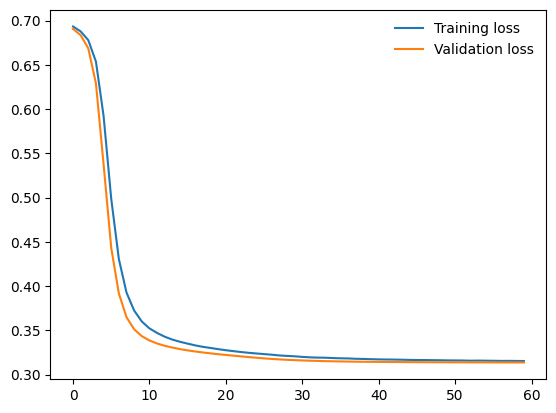

In [52]:
plt.plot(tn_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(frameon=False)

plt.show()

In [53]:
import torch
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [69]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # Блок тестирования модели
results=[]
y_test = []
predictions = []
for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data[:,1:105])
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    results.append([int(data[:,0].item()), pred.item()])
    correct = pred.eq(target.view_as(pred))
    y_test.append(target)
    predictions.append(pred)
  
 
    for i in range(len(target)):
        label = target.data
        class_correct[label] += correct.item()
        class_total[label] += 1


test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.314473

Test Accuracy of     0: 99% (9702/9711)
Test Accuracy of     1: 100% (12832/12832)

Test Accuracy (Overall): 99% (22534/22543)


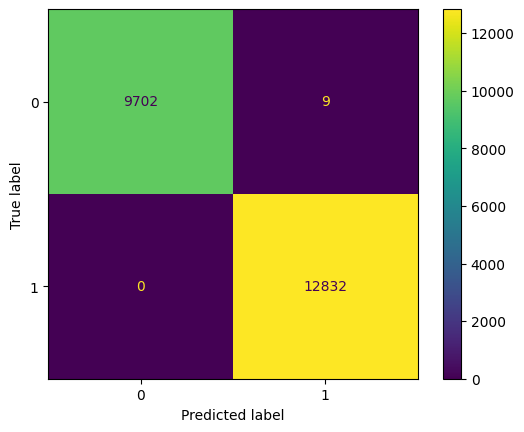

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
device = torch.device("cpu")
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()